In [1]:
import numpy as np
from scipy.stats import norm, gamma, iqr
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1729)

## Useful functions

Here we define a couple of functions to calculate Binomial probabilities and also cumulative probabilities for the Binomial distribution. We will use these functions in later examples.

In [3]:
def binomial_probability(N,p,k):
    '''
    A function to calculate probabilities from 
    the Binomial distribution
    
    :param N: The number of Bernoulli trials.
    :type N: int
    
    :param p: The probability of success of each individual trial
    :type p: float
    
    :param k: The number of successes for which we want to 
              calculate the probability
    :type k: int
    
    :rtype: float
    '''

    # Calculate the log of the Binomial coefficient
    log_prob = np.log(np.math.factorial(N))
    log_prob -= np.log(np.math.factorial(k))
    log_prob -= np.log(np.math.factorial(N-k))

    # Add the log of the probability of n successes
    log_prob += float(k)*np.log(p)
    log_prob += float(N-k)*np.log(1.0-p)

    # Exponentiate (to base e) and return
    return np.exp(log_prob)

def cumulative_binomial_probability(N,p):
    '''
    A function to calculate the Binomial cumulative 
    probability distribution.
    
    :param N: The number of Bernoulli trials.
    :type N: int
    
    :param p: The probability of success of each individual trial
    :type p: float
    
    :rtype: A 1-D numpy array of reals of length N+1
    '''
    
    
    # Initialize array to hold cumulative probabilities
    cumulative_probs = np.zeros(N+1)

    # Set the first cumulative probability equal to the Binomial probability 
    # of getting zero successes
    cumulative_probs[0] = binomial_probability(N=N,p=p,k=0)
    
    # Loop over the remaining cumulative probabilities and increment them
    for i in range(1,N+1):
        cumulative_probs[i] = cumulative_probs[i-1] + binomial_probability(N=N,p=p,k=i)

    return cumulative_probs


## 1st example of sampling from a Binomial distribution

In this example we sample 1000 values from the Binomial(20, 0.6) distribution. We do this using the 'first principles' approach where we compare a random value from Uniform(0,1) to the cumulative probability distribution of the Binomial(20, 0.6) distribution. This is the long way of doing the sampling.

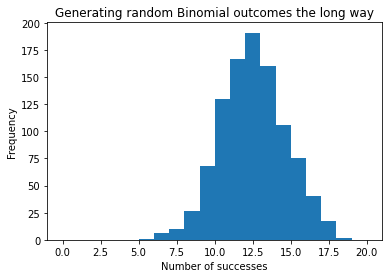

In [4]:
# Set parameters of the Binomial distribution
# We will use 20 trials and a success probability of 0.6
N = 20
p = 0.6

# Calculate the cumulative probability distribution 
# of the Binomial
cumulative_probs = cumulative_binomial_probability(N=N,p=p)

# Set how many random numbers we want to generate
# and initialize an empty array to hold them
n_random = 1000
random_binomial = np.empty(n_random, dtype=np.int8)

# Loop to generate the random Binomial numbers
for i in range(n_random):
    # Draw a random number from U(0,1)
    r_tmp = np.random.rand(1)
    
    # See where the cumulative probability distribution first exceeds
    # the uniform random number we just created
    random_binomial[i] = np.where(cumulative_probs - r_tmp > 0.0)[0][0]

# Plot histogram of the generated numbers
plt.hist(random_binomial, bins=range(0,N+1))
plt.title('Generating random Binomial outcomes the long way')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.show()

## 2nd example of sampling from a Binomial distribution

In this example we sample 1000 values from the Binomial(20, 0.6) distribution, but we use the in-built Binomial distribution function of numpy.random. This is the quick way of doing the sampling.

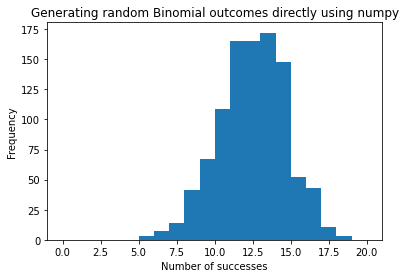

In [5]:
# Using numpy to sample from a Binomial distribution

n_random = 1000
random_binomial2 = np.random.binomial(n=N, p=p, size=n_random)

# Plot histogram of the generated numbers
plt.hist(random_binomial2, bins=range(0,N+1))
plt.title('Generating random Binomial outcomes directly using numpy')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.show()

## Example of sampling from a Poisson distribution

Here we use the in-built Poisson distribution sampler from numpy.random to sample 10000 values $Poisson (\lambda=5.2)$. 

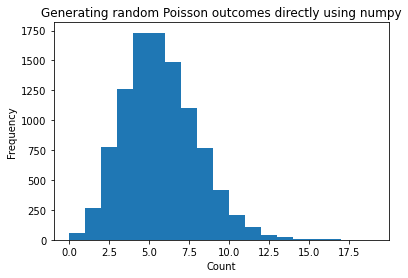

In [6]:
# Using numpy to sample from a Poisson distribution
# We set the mean number of counts to 5.2
# This is specified by the 'lam' argument of the 
# numpy function.

n_random = 10000
random_poisson = np.random.poisson(lam=5.2, size=n_random)

# Plot histogram of the generated numbers
plt.hist(random_poisson, bins=range(20))
plt.title('Generating random Poisson outcomes directly using numpy')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

## Example of sampling from a Gaussian distribution

Here we demonstrate two different ways of sampling from a Gaussian distribution using in-built functions from numpy.random.

The first method uses numpy.random.randn which generates values from Normal(0,1) which we then scale by the required standard deviation and add the required mean to generate values from Normal(2.0, 2.25). 

The second method uses numpy.random.normal which generates values from $Normal (\mu, \sigma^{2})$ and so we pass the required mean and standard deviation directly into the function numpy.random.normal .

We plot the histograms of the two samples to show that the two samples are similar.

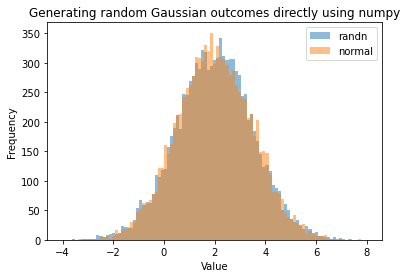

In [7]:
# Using numpy to sample from a Gaussian distribution
# We set the population mean=2.0 and the 
# standard deviation=1.5.
mean = 2.0
sd = 1.5

# We first sample from the standard Gaussian 
# distribution (zero mean and unit variance)
# and apply a simple linear transformation
n_random = 10000
random_gaussian1 = mean + (sd*np.random.randn(n_random))

# Alternatively, we can use the normal function of
# numpy.random without having to apply the linear 
# transformation
random_gaussian2 = np.random.normal(loc=mean, scale=sd, size=n_random)

# Plot histogram of the generated numbers
bins = np.linspace(-4, 8, 100)
plt.hist(random_gaussian1, alpha=0.5, bins=bins, label='randn')
plt.hist(random_gaussian2, alpha=0.5, bins=bins, label='normal')
plt.legend(loc='upper right')
plt.title('Generating random Gaussian outcomes directly using numpy')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Central Limit Theorem example with Uniform random variables

We will generate 100000 sets of 20 Uniform(0,1) random values. For each of these sets we sum the 20 random values. This give us 100000 totals which we plot as a histogram. We use the cumulative probability distribution of the Normal distribution predicted by the CLT to compute the histogram heights we would expect from the CLT approximation.  

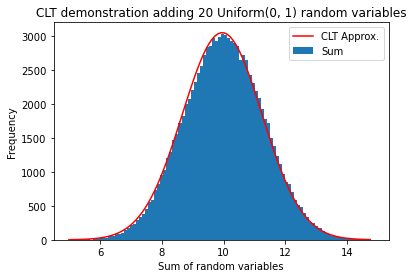

In [8]:
## Central Limit Theorem Uniform Example 
n_random_var = 20 # The number of random variables we add together
n_simulations = 100000 # The number or experiments we will run

# Initialize an array to hold the results of the experiments
total_of_random_vars = np.zeros(n_simulations)

# Loop over the experiments
for i in range(n_simulations):
    # generate n_random_var Uniform(0, 1) values and sum them 
    total_of_random_vars[i] = np.sum(np.random.rand(n_random_var))

# Plot the frequencies of the experiment totals as a histogram
plot = plt.hist(total_of_random_vars, bins=100, label='Sum')

# Construct expected frequencies according to Central Limit Theorem
mean_CLT = n_random_var * 0.5 # The mean of the sum of the random variables
var_CLT = n_random_var /12.0 # The variance of the sum of the random variables
std_CLT = np.sqrt(var_CLT) # The standard deviation of the sum of the random variables

# Store the x values at which we which to calculate the CLT approximation.
# Since we want to plot the CLT approximation on top of the histogram we
# will use the positions of the histogram bins as our x values
x_values = plot[1]

# Initialize an array to hold the results of the CLT approximation
clt_expected_frequency = np.zeros(len(x_values)-1)

# Loop over the x values
for i in range(len(x_values)-1):
    
    # Since we are comparing to the frequencies in the histogram we need to calculate
    # the expect number of experiments whose sum is in between the current and next 
    # x value. This expected frequency is equal to the total number of experiments
    # multiplied by the probability of an experiment having its sum between the current 
    # and next x value. This probability is the difference in cumulative probability 
    # between those two x values. Since we are using the CLT, we are approximating the 
    # probability density function of an experiment sum by a Normal distribution with 
    # mean = number of random variables * mean of each random variable, and 
    # variance = number of random variables * variance of each random variable. 
    # To calculate the cumulative probability of a Normal distribution we use the 
    # scipy.norm.cdf function.
    cumulative_prob1 = norm.cdf((x_values[i+1] - mean_CLT)/std_CLT)
    cumulative_prob2 = norm.cdf((x_values[i] - mean_CLT)/std_CLT)
    cumulative_prob_diff = cumulative_prob1 - cumulative_prob2
    clt_expected_frequency[i] = n_simulations * cumulative_prob_diff

    
# Plot the CLT expected frequencies on top of the histogram
plt.plot(x_values[:-1], clt_expected_frequency, 'red', label='CLT Approx.')

# Add graph annotation and display
plt.legend(loc='upper right')
plt.title('CLT demonstration adding 20 Uniform(0, 1) random variables')
plt.xlabel('Sum of random variables')
plt.ylabel('Frequency')
plt.show()


## Central Limit Theorem example using Binomial random variables

We repeat the previous CLT example, but where our 100000 sums are constructed by adding up 365 Binomial(20, 0.3) random values. Each of the 100000 is intended to represent an example of the total yearly sales of a product whose daily sales are distributed as Binomial(20, 0.3).

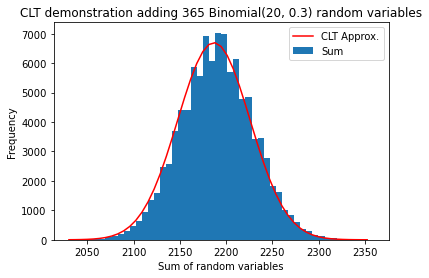

In [9]:
## Central Limit Theorem Binomial Example
n_days = 365 # The number of random variables we add together
n_bernoulli_trials = 20 # The number of trials in each Binomial random variable
p_success = 0.3 # The success probability for each Binomial random variable 
n_simulations = 100000 # The number or experiments we will run

# Initialize an array to hold the results of the experiments
items_sold_in_period = np.zeros(n_simulations) 

# Loop over the experiments
for i in range(n_simulations):
    # generate n_random_var Binomial(20, 0.3) values and sum them
    items_sold_in_period[i] = np.sum(np.random.binomial(n_bernoulli_trials, p_success, n_days))

# Plot the frequencies of the experiment totals as a histogram
plot = plt.hist(items_sold_in_period, bins=50, label='Sum')
    
# Construct expected counts according to Central Limit Theorem
mean_CLT = n_days * n_bernoulli_trials * p_success # The mean of the sum of the random variables
var_CLT = n_days * n_bernoulli_trials * p_success * (1.0 - p_success) # The variance of the sum of the random variables
std_CLT = np.sqrt(var_CLT) # The standard deviation of the sum of the random variables

# Store the x values at which we which to calculate the CLT approximation.
# Since we want to plot the CLT approximation on top of the histogram we
# will use the positions of the histogram bins as our x values
x_values = plot[1]

# Initialize an array to hold the results of the CLT approximation
clt_expected_frequency = np.zeros(len(x_values)-1)

# Loop over the x values
for i in range(len(x_values)-1):
    # Since we are comparing to the frequencies in the histogram we need to calculate
    # the expect number of experiments whose sum is in between the current and next 
    # x value. This expected frequency is equal to the total number of experiments
    # multiplied by the probability of an experiment having its sum between the current 
    # and next x value. This probability is the difference in cumulative probability 
    # between those two x values. Since we are using the CLT, we are approximating the 
    # probability density function of an experiment sum by a Normal distribution with 
    # mean = number of random variables * mean of each random variable, and 
    # variance = number of random variables * variance of each random variable. 
    # To calculate the cumulative probability of a Normal distribution we use the 
    # scipy.norm.cdf function.    
    cumulative_prob1 = norm.cdf((x_values[i+1] - mean_CLT)/std_CLT)
    cumulative_prob2 = norm.cdf((x_values[i] - mean_CLT)/std_CLT)
    cumulative_prob_diff = cumulative_prob1 - cumulative_prob2
    clt_expected_frequency[i] = n_simulations * cumulative_prob_diff
    
# Plot the CLT expected frequencies on top of the histogram
plt.plot(x_values[:-1], clt_expected_frequency, 'red', label='CLT Approx.')

# Add graph annotation and display
plt.legend(loc='upper right')
plt.title('CLT demonstration adding 365 Binomial(20, 0.3) random variables')
plt.xlabel('Sum of random variables')
plt.ylabel('Frequency')
plt.show()

## Kernel density estimation example

In this example we draw 30 random values from a Gamma(5, 1) distribution. From thoe dataset of those 30 values we then construct kernel density estimates of the original probability density. We compute two kernel density estimates, one using a Parzen (Gaussian) kernel with a bandwidth of 1.0 (the default value), and one using an Exponential kernel function with a bandwidth calculated using Silverman's rule of thumb $h = 0.9 \times min(s, IQR/1.35) \times n^{-\frac{1}{5}}$. We plot the two kernel density estimates, as well as the true probability density which we know from form of the Gamma(5, 1) distribution.

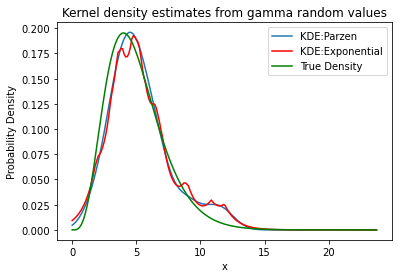

In [10]:
## Kernel density estimation example

# Set the seed for the random number generator
np.random.seed(280)

# First we sample our x values
shape = 5.0
scale = 1.0
n_sample = 30 # The number of data points in our sample
x_sample = np.random.gamma(shape=shape, scale=scale, size=(n_sample,1))

# Calculate summary statistics of the sample
sample_std = np.std(x_sample)
sample_iqr = iqr(x_sample)

# Construct the kernel density function using a Parzen (Gaussian window)
# and using the default bandwidth (=1.0)
parzen_kde = KernelDensity(kernel='gaussian').fit(x_sample)

# Construct x values at which we want to calculate the 
# kernel density estimate
x = np.linspace(0, 2.0*np.max(x_sample),200)

# Calculate the log of the kernel density estimate for the regular spaced points
log_density_parzen = parzen_kde.score_samples(x.reshape(200,1))
plt.plot(x, np.exp(log_density_parzen), label='KDE:Parzen')

# Repeat kernel density estimation using a different kernel function
# We use a exponential kernel. We will set the bandwidth using 
# Silverman's rule of thumb
bandwidth = 0.9*np.min([sample_std, sample_iqr/1.35]) * np.power(float(n_sample), -0.2)
exponential_kde = KernelDensity(kernel='exponential', bandwidth=bandwidth).fit(x_sample)
log_density_exponential = exponential_kde.score_samples(x.reshape(200,1))
plt.plot(x, np.exp(log_density_exponential), 'red', label='KDE:Exponential')

# Add the true density function
plt.plot(x, gamma.pdf(x, shape)/scale, 'green', label='True Density')

# Add graph annotation and display
plt.legend(loc='upper right')
plt.title('Kernel density estimates from gamma random values')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()

